## Урок 4. Визуальный анализ данных


Данная промежуточная аттестация оценивается по системе "зачет" / "не зачет".
"Зачет" ставится, если слушатель успешно выполнил 3 или 2 критерия.
"Незачет" ставится, если слушатель успешно выполнил 1 или меньше критериев.

Критерии оценивания:
- слушатель верно подгрузил данные в библиотеку
- слушатель сформировал корректный график по данным
- слушатель проанализировал данные и сделал корректный вывод



In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Условие 1: Задача 1
Постройте график.
Назовите график.<br>
Сделайте именование оси x и оси y.<br>
Сделайте выводы

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information

In [3]:
df = pd.read_csv('kc-house-data.csv', encoding='cp1251', index_col = 'id')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

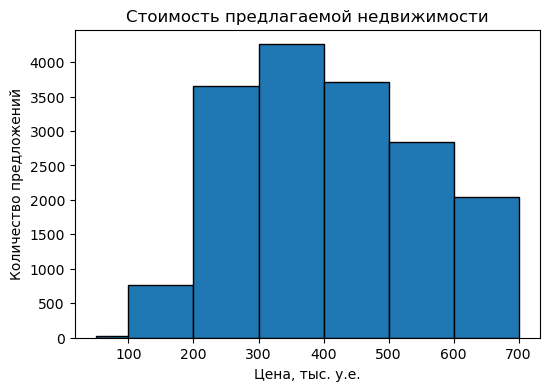

In [4]:
plt.figure(figsize=(6, 4))
plt.hist(df['price']/1000, edgecolor='black', bins=[50, 100, 200, 300, 400, 500, 600, 700])
plt.title('Стоимость предлагаемой недвижимости')
plt.xlabel('Цена, тыс. у.е.')
plt.ylabel('Количество предложений');

1. Ширина bin-ов говорит о высоком разбросе цен.
2. Цена недвижимлсти высокая: львиная часть объектов предлагается по ценам от 100 тыс. до 6 млн. у.е.
3. Максимальное количество предлложений лежат в диапазоне 300 - 400 тыс. у.е.


### 1.3 Изучите распределение квадратуры жилой площади

In [5]:
df['sqft_living'].max(), df['sqft_living'].min()

(13540, 290)

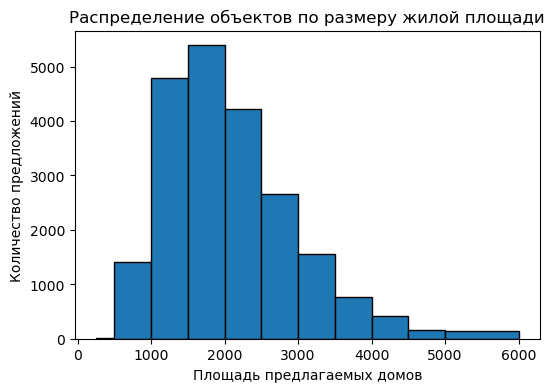

In [6]:
plt.figure(figsize=(6,4))
plt.hist(df['sqft_living'], edgecolor = 'black', bins = [250, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000])
plt.title('Распределение объектов по размеру жилой площади')
plt.xlabel('Площадь предлагаемых домов')
plt.ylabel('Количество предложений')
plt.show()

1. Основная часть домов имеют жилую площадь от 1000 до 3000 кв.ед.
2. Максимальное количество объектов имеют площадь от 1,5 до 2 тыс. кв.ед.
3. Минимальное количество предложений для домов жилой площадью менее 500 и более 5000 кв.ед.
4. Максимальный разброс цен имеют объекты площадью свыше 5000 кв.ед.

### 1.4 Изучите распределение года постройки

In [7]:
yr_5 = [i for i in range(df['yr_built'].min(), df['yr_built'].max(), 5)]

Text(0.5, 1.0, 'Годы постройки объектов недвижимости')

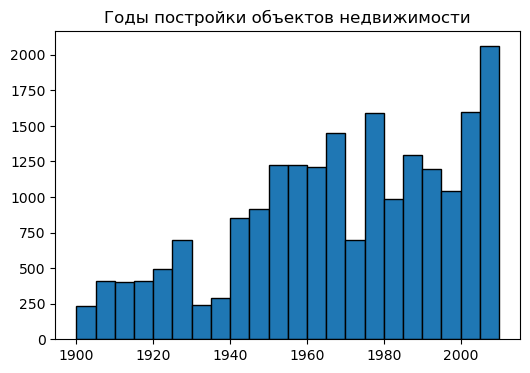

In [8]:
plt.figure(figsize=(6,4))
plt.hist(df['yr_built'], edgecolor='black', bins = yr_5)
plt.title('Годы постройки объектов недвижимости')

1. Основная часть проданной недвижимости построена не позже 1950 года.
2. Максимальное количество сделок- дома постройки 2005- 2010 годами.
3. Следующий по количеству пул образуют дома постройки 1975-1980 и 2000-2005 годов.
4. Дома посторойки ранее 1900 года в продаже отсутствуют.

## Условие 2: 2 задача
### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

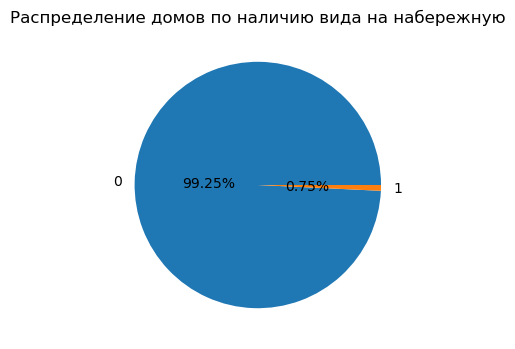

In [9]:
plt.figure(figsize=(6,4))
plt.pie(df['waterfront'].value_counts(), autopct='%1.2f%%', labels = df['waterfront'].value_counts().index, pctdistance =0.4);
plt.title('Распределение домов по наличию вида на набережную');

1. В графстве мало открытых водоемов.
2. Данный вид графика при нашей статистике мало информативен.

### 2.2. Изучите распределение этажей домов

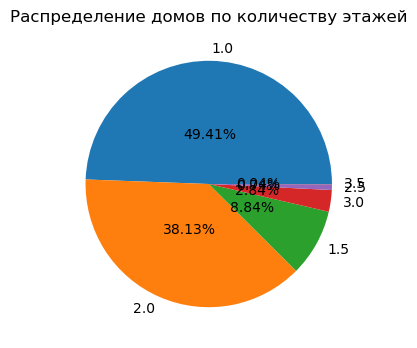

In [10]:
plt.figure(figsize=(6,4))
plt.pie(df['floors'].value_counts(), autopct='%.2f%%', labels = df['floors'].value_counts().index, pctdistance =0.4);
plt.title('Распределение домов по количеству этажей');

##### Домов этажностью 3,5 мало и сегмент сливается с сегментом "2,5", поэтому ниже приведен доработанный вариант диаграммы.

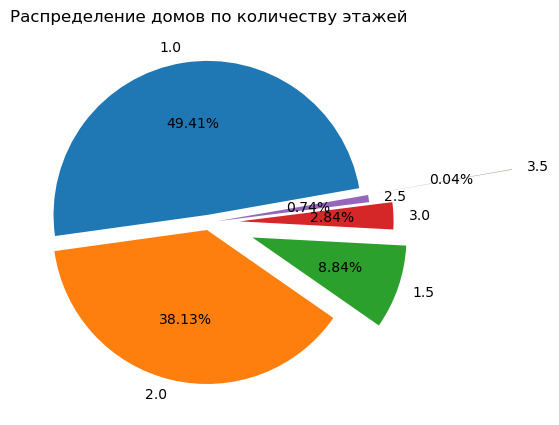

In [11]:
plt.figure(figsize=(7,5))
plt.pie(df['floors'].value_counts(), explode = (0.05, 0.05, 0.3, 0.2, 0.05, 1.0),\
        startangle = 10, autopct='%.2f%%', labels = (df['floors'].value_counts().index));
plt.title('Распределение домов по количеству этажей');

1. График подтверждает штамп "одноэтажная Америка": практически половина из проданных домов- одноэтажные.
2. Самые практичные для людей среднего возраста 1,5 и 2-х этажные дома вместе составили в продажах заметные 47%.
3. Доля домов выше 2 этажей- менее 4%. Без совместной оценки с другими параметрами- малоинформативный факт.
4. 3,5 этажа в доме- нужна прислуга, для возрастных- лифт. 

### 2.3. Изучите распределение состояния домов

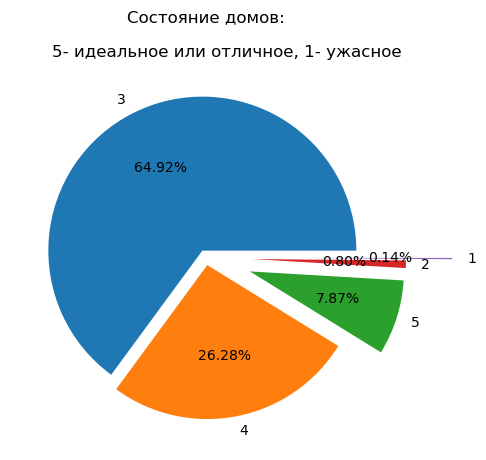

In [12]:
plt.figure(figsize=(7,5))
plt.pie(df['condition'].value_counts(), autopct='%1.2f%%',\
        labels = df['condition'].value_counts().index,\
        explode = (0.05, 0.05, 0.3, 0.3, 0.6));
plt.title("Состояние домов:"
                          "\n" "\n"
                  "        5- идеальное или отличное, 1- ужасное");

1. 65% проданных домов имели состояние "на 3".
2. Отрадно, что более 1/3 домов содаржались в хорошем и отличном состоянии.
3. Домов в плохом и ужасном состоянии продано менее 1%. Возможно планируется их реновация или привлек сам участок.

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости,<br>с применением не менее 5 диаграмм из урока.<br>
Анализ сделайте в формате ___storytelling___: дополнить каждый график письменными выводами и наблюдениями.

Период продаж и дислокация проданных домов нам известны и в учебных целях нас не интересуют.<br> А вот оставшиеся параметры проданных домов визуализируем сначала на одном дашборде в виде гистограмм. Для общего понимания, так сказать.<br>
Для этого с помощью ```df.info() ``` проверим типы данных в таблице. Нам будут мешать в дальнейшем нечисловые форматы.<br>
Их мы отфильтруем.

In [13]:
df_nums_columns = df.select_dtypes(include = ['float64', 'float32', 'int64'])
df_nums_columns.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
3278600900,443000.0,3,2.50,1780,2778,2.0,0,0,3,8,1530,250,2007,0,98126,47.5487,-122.372,1380,1998
7012200215,795000.0,3,3.25,2260,3727,2.0,0,0,3,8,1880,380,2003,0,98119,47.6422,-122.361,1600,4800
3624039074,430000.0,3,1.00,1210,5200,1.0,0,0,3,6,1210,0,1941,0,98126,47.5310,-122.373,890,5200
4449800315,412000.0,2,1.00,1260,3960,1.0,0,0,3,6,690,570,1925,0,98117,47.6899,-122.391,1250,3960
5416500520,300000.0,3,2.50,1750,4200,2.0,0,0,3,7,1750,0,2005,0,98038,47.3605,-122.040,1890,4048


Таблица для контроля. ```df.info() ``` можно повотрить для уверенности.<br><br>
###### Итак, смотрим промежуточный результат

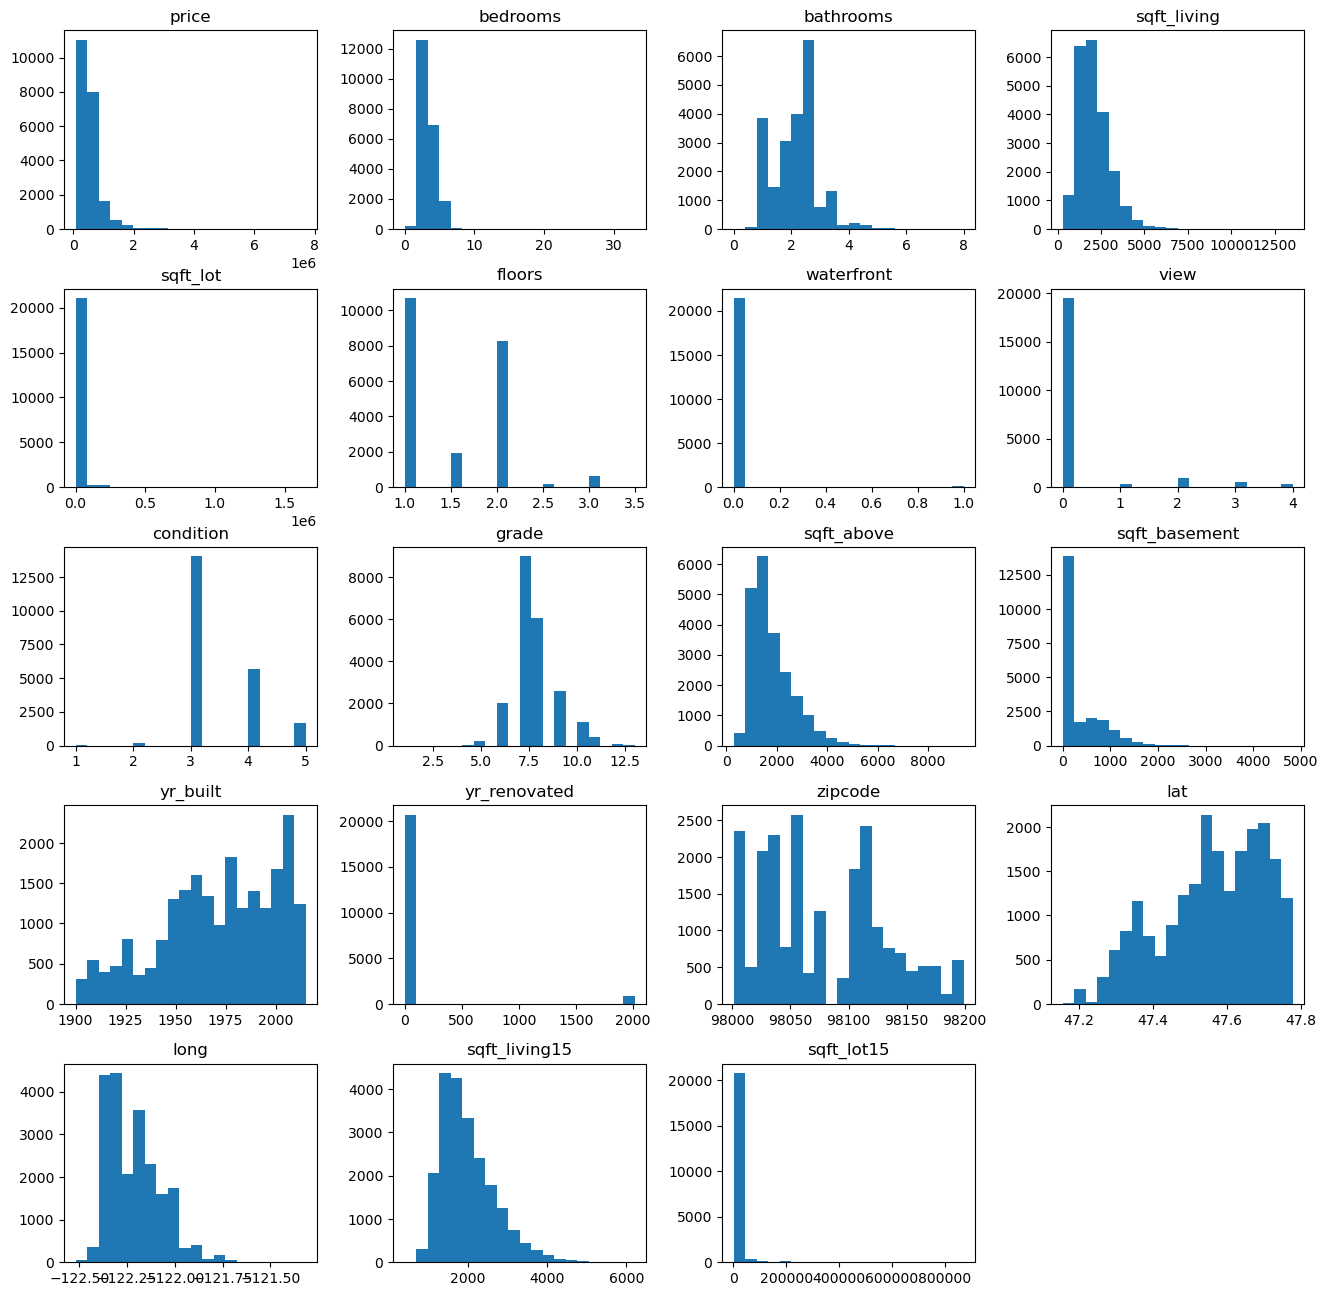

In [14]:
df_nums_columns.hist(figsize=(16,16), bins=20, grid=False);

Продолжим.<br>Определение параметров недвижимости, влияющих на ее стоимость, можно начать с построения корреляционной матрицы.<br> При этого с помоью условия ```numeric_only = True``` исключаем типы данных, не являющихся числовыми.

In [15]:
corr_matrix = df.corr(numeric_only = True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
# corr_matrix

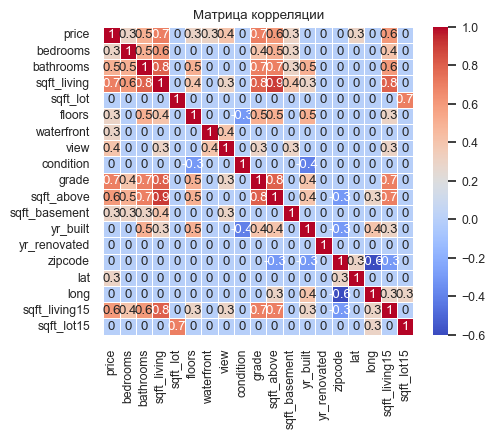

In [16]:
plt.figure(figsize=(5, 4))

sns.set(font_scale=0.8)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Матрица корреляции');

###### Матрица корреляции готова. 
Изучим ее.

Итак, мы видим, что наиболее заметное влияние (от 0.5 и выше) на цену имет всего параметров:<br><br>
    &emsp;- ___sqft_living-___ жилая площадь проданных домов;<br>
    &emsp;- ___sqft_above-___ площадь надземной части дома;<br>
    &emsp;- ___grade-___ оценка конструктивных особенностей и дизайна;<br>
    &emsp;- ___bathrooms -___ количество ванных комнат.<br><br>
    Теперь с помощью графиков для каждого из параметров, проверим полученные результаты.

#### 1. Влияние размера жилой площади на цену недвижимости:

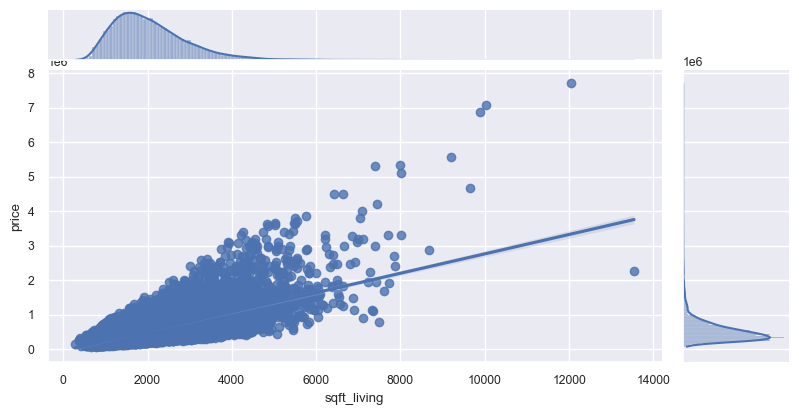

In [17]:
# sqft_living

sns.jointplot(x=df['sqft_living'], y=df['price'], kind ='reg').fig.set_size_inches((8.5, 4));

1. График явно иллюстрирует зависимость цены от жилой площади проданного дома и ее прямой линейный характер.
2. Разброс цен увеличивается с ростом площади дома
3. Максимальным спросом пользовались дома площадью около 2000 кв.фт
4. Домов большой площади продано мало. Гипотезы:
    - цена отпугивает;
    - таких домов мало в этих краях;
    - высокая стоимость либо проблемность содержания
    - сложны в продаже;
    - территория графства мало привлекательна для богатых. 

#### 2. Влияние размера площади надземной части домов на их цену:

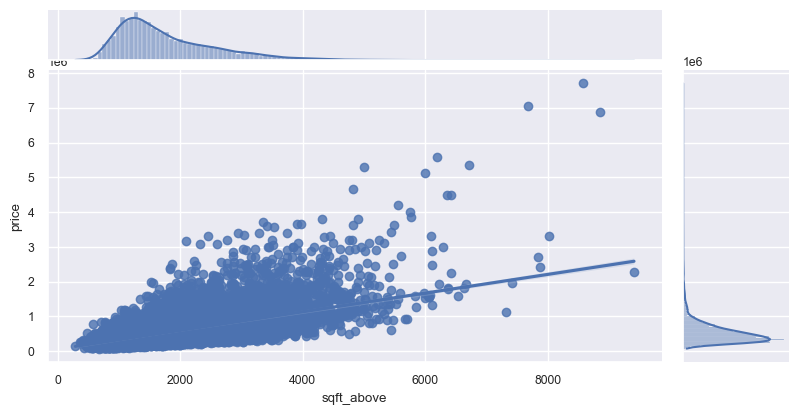

In [18]:
# sqft_above
sns.jointplot(x=df['sqft_above'], y=df['price'], kind ='reg').fig.set_size_inches((8.5, 4));


1. Характер зависимости цены от надземной части домов идентичен паре цена-жилая площадь: прямая линейная.
2. Это частично подтверждает выводы по предыдущему пункту и не противоречит общей логике.
3. По результатм продаж можно предположить, что подвалы покупателям не сильно нужны.
4. Второе предположение: имеются надворные постройки, которые предпочтительнее подвалов.

#### Зависимость цены дома от оценки его конструктивных особенностей и дизайна:

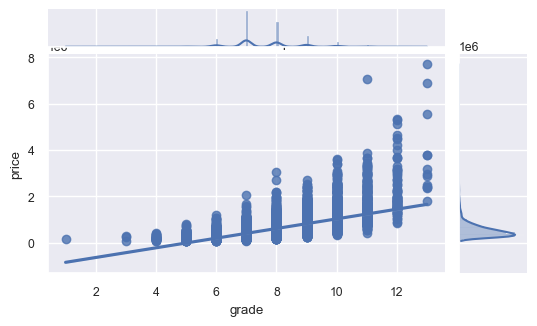

In [19]:
#  grade

sns.jointplot(x=df['grade'], y=df['price'], kind='reg').fig.set_size_inches((5.5,3));
plt.title("Total Bill vs Tip");

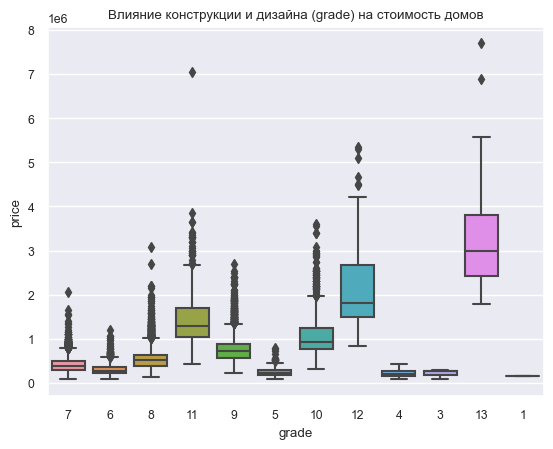

In [20]:
# grade

sns.boxplot(x=df['grade'].astype('str'), y=df['price'], whis=1.5)
plt.title('Влияние конструкции и дизайна (grade) на стоимость домов');

1. Цена проданных домов имеет прямую линейную зависимость от их конструкции и дизайна.
2. Это наглядно иллюстрируют оба типа графиков.
3. Наиболее вероятно, что дома именно такой конструкции максимально отвечают местным особенностям.

#### Зависимость цены дома от количества ванных комнат:

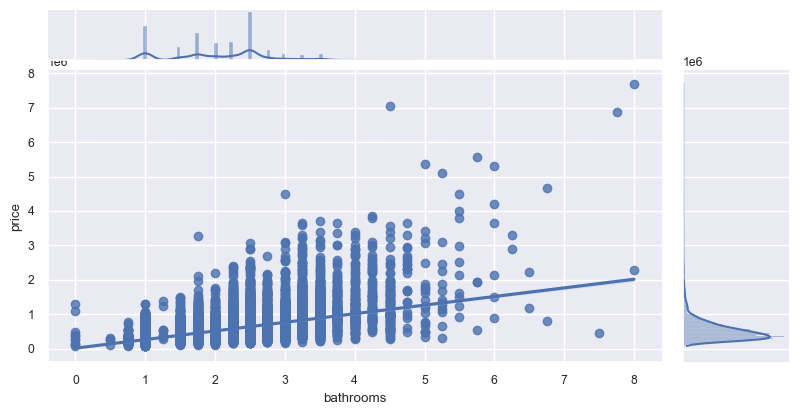

In [21]:
# bathrooms

sns.jointplot(x=df['bathrooms'], y=df['price'], kind='reg').fig.set_size_inches((8.5, 4));

1. Цена формально имеет прямую линейную зависимость от количества ванных комнат. <br>
    &emsp;Но скорее это говорит о более высоком качестве самого дома, а не просто о количестве ванных комнат самих по себе.
2. Наиболее востребованными оказались дома, в которых 2 и более ванных комнаты.
3. В отдельных случаях даже отсутствие ванной, как отдельного помещения, не помешало продать дом по более высокой цене.

#### Ну и самое красивое. Рассмотрим географическое положение проданных домов.

Для этого из справочника возьмем координаты крайних точек искомой местности. В нашем датасете это штат Вашингтон, США.

In [22]:
# Координаты крайних точек штата Вашингтон, США
min_long = -116.92
max_long = -124.77
min_lat = 45.55
max_lat = 49.00

Теперь импортируем карту соответствующей части США. <br>В моем случае понадобилось ее загрузить на комп. в одну директорию с файлом Jupiter: иначе не работала.

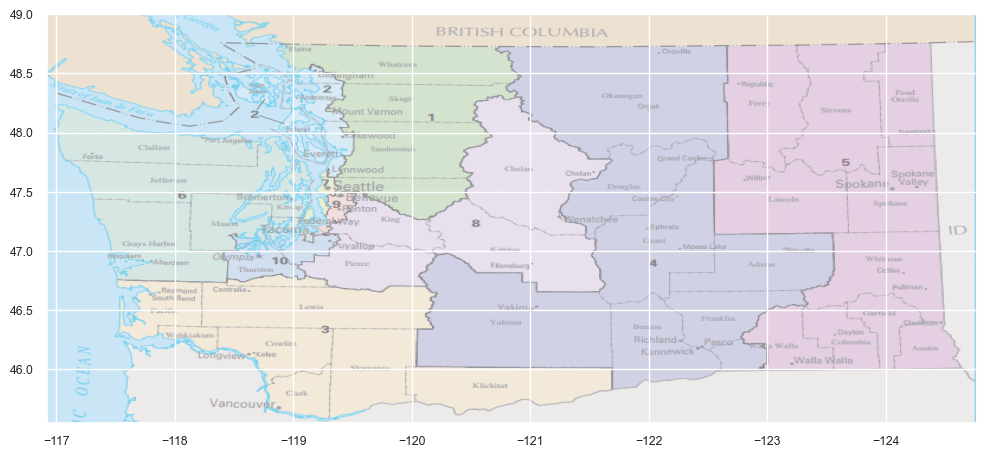

In [23]:
import matplotlib.image as img
washington_map = img.imread('Washington_map.png')

plt.figure(figsize=(12, 9))
plt.imshow(washington_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5);

Ну и финальная процедура: код для отражения географии продаж из нашего датасета на карте.<br> Цветовую шкалу плотности концентрации фактора ```plt.colorbar(sc) ``` исключил- цветовых градаций практически нет, да и карта по-больше получается.

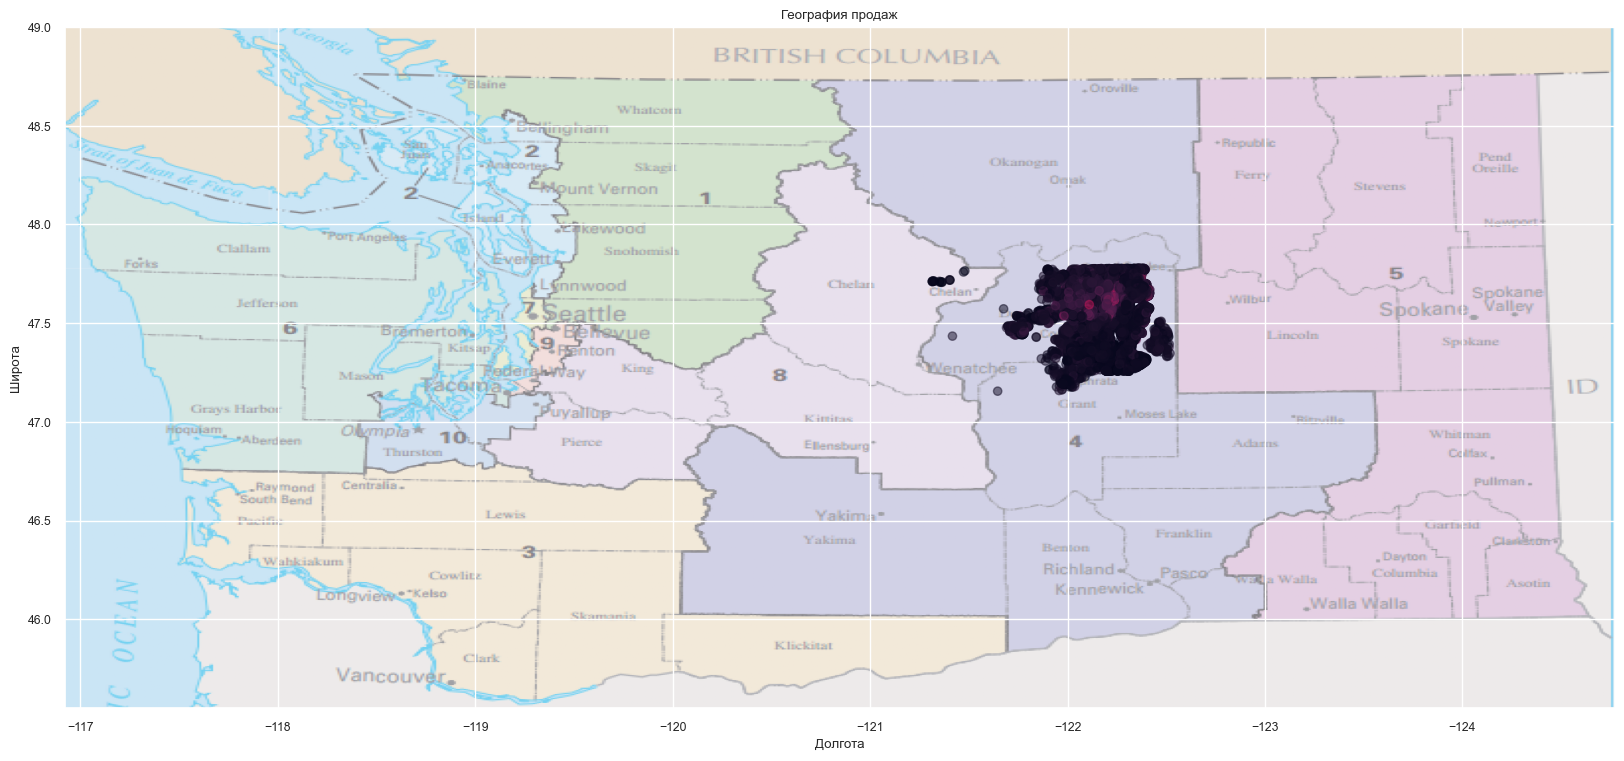

In [24]:
plt.figure(figsize=(20, 12))
                    
sc = plt.scatter(df['long'], df['lat'], alpha=0.5, c=df['price'])

plt.imshow(washington_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

# plt.colorbar(sc)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('География продаж');

Данные используемого датасета в части география продаж с привязкой к геоданным показывают,<br> что в период 2014-2015 года на достаточно ограниченной территории штата Вашингтон, США,<br>случился бум продаж домов. Видимо, и покупок тоже. <br>Достоверных данных об истинных причинах у нас нет, рынок и его особенности нам неведомы.<br>
Одно очевидно- это ипотека в лучшем случае, а то и кредит. В нынешних условиях не позавидуешь<br>


Задание выполнено.<br>Учебные цели достигнуты.